# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is a field of artificial intelligence and computer science that allows as getting information from images or videos such as identifying objects, face recognization, detecting motions, etc. 

In [1]:
# Import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
print(tf.__version__)

2.12.0


## Get the data

The images we are working on are from Food 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However this datasets modified it to only use two classes. This classes are pizza and steak.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-05-25 09:37:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.8MB/s    in 5.5s    

2023-05-25 09:37:57 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very important step at the beginning of the any machine learning project is understanding data or inspecting the data. For the computer vision this means visualizing many sample of data.

In [3]:
# List pizza_steak directory
!ls pizza_steak

test  train


In [4]:
# List train directory
!ls pizza_steak/train

pizza  steak


In [5]:
# List steak directory in the pizza directory
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

Woww. There are banch of images here.. And let's walk through pizza_steak directory and list number of files.

In [6]:
import os

# List number of files in pizza_steak
for dir in os.walk('pizza_steak'):
  print(f'There are {len(dir[1])} directories and {len(dir[2])} images in {dir[0]}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


Totally, there are 1500 images for training. 750 of them is steak and 750 of them is pizza. For the testing we have 500 images and 250 of them is for pizza and others for steak.

In [7]:
# Another way to find how many images are in a file
num_steak_images_train = os.listdir('pizza_steak/train/steak')

print(f'There are {len(num_steak_images_train)} steak images for training.')

There are 750 steak images for training.


To visualize the images, first let's get the class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class names based on subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize the images
def view_random_image(target_dir, target_classes):
  
  # Setup the target directory
  target_folder = target_dir + target_classes

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read and plot image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_classes)
  plt.axis('off')
  plt.show()

  # Show the shape of image
  print(f'Image shape: {img.shape}')

  return img

['2548974.jpg']


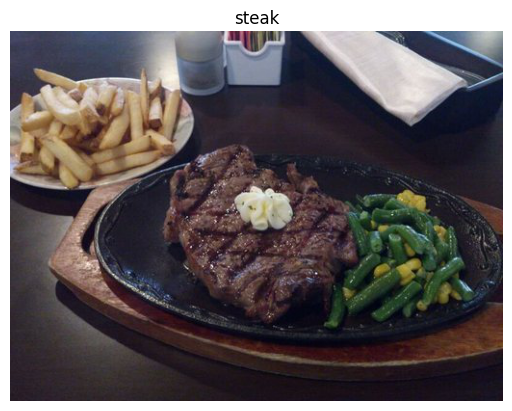

In [10]:
# Let's visualize a random image in steak
random_steak = view_random_image('pizza_steak/train/', 'steak')

Image shape: (384, 512, 3)
['199019.jpg']


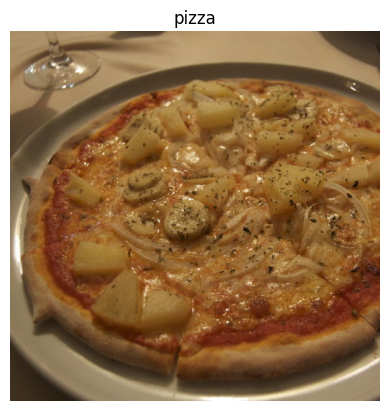

Image shape: (512, 512, 3)


In [11]:
# Let's visualize a random image in pizza
random_pizza = view_random_image('pizza_steak/train/', 'pizza')

In [12]:
# The images we plot are actually giant array or tensor of different pixel values
tf.constant(random_pizza)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  72,  56],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  4

In [13]:
# View the shape
random_pizza.shape # returns width, height and colour channels

(512, 512, 3)

In [17]:
# Get all pixel values between 0 and 1 (normalize the data)
tf.constant(random_pizza) / 255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.6627451 , 0.54509807, 0.39607844],
        [0.6666667 , 0.54901963, 0.4       ],
        [0.6666667 , 0.54901963, 0.4       ],
        ...,
        [0.16862746, 0.12941177, 0.09019608],
        [0.16470589, 0.1254902 , 0.08627451],
        [0.16470589, 0.1254902 , 0.08627451]],

       [[0.6627451 , 0.54509807, 0.39607844],
        [0.6627451 , 0.54509807, 0.39607844],
        [0.6666667 , 0.54901963, 0.4       ],
        ...,
        [0.1764706 , 0.13725491, 0.09803922],
        [0.17254902, 0.13333334, 0.09411765],
        [0.17254902, 0.13333334, 0.09411765]],

       [[0.65882355, 0.54901963, 0.39607844],
        [0.65882355, 0.54901963, 0.39607844],
        [0.65882355, 0.54901963, 0.39607844],
        ...,
        [0.18431373, 0.14509805, 0.10588235],
        [0.18039216, 0.14117648, 0.10196079],
        [0.18039216, 0.14117648, 0.10196079]],

       ...,

       [[0.25882354, 0.19607843, 0.13333334],
        [0.25

## An end-to-end example CNN

Let's build a convolutional neural network to find pattern in our images. Here are steps:

* Load images
* Preprocessing images
* Build a CNN model to find pattern in images
* Compile CNN
* Fit the CNN to our training data

In [22]:
# Import image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Set random seed
tf.random.set_seed(42)

# Preprocessing images (data scaling or normalization)
train_datagen = ImageDataGenerator(rescale=(1./255))
valid_datagen = ImageDataGenerator(rescale=(1./255))

# Setup path to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')    
]) 

# Compile the CNN
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 261ms/step - loss: 0.5882 - accuracy: 0.7253 - val_loss: 0.5379 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4812 - accuracy: 0.7833 - val_loss: 0.4084 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 11s 223ms/step - loss: 0.4276 - accuracy: 0.8053 - val_loss: 0.3801 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3971 - accuracy: 0.8193 - val_loss: 0.3380 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3531 - accuracy: 0.8560 - val_loss: 0.3319 - val_accuracy: 0.8540


In [41]:
# Get the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before not CNN

Let's replicate the model we've built in a previous section to see if it works with image data.

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 217ms/step - loss: 0.7215 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6932 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Hmm.. Maybe we can improve the model. Let's try adding more layer and hiddin units.

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 221ms/step - loss: 1.6388 - accuracy: 0.6040 - val_loss: 1.2401 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6768 - accuracy: 0.6873 - val_loss: 0.4806 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4915 - accuracy: 0.7653 - val_loss: 0.4770 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4729 - accuracy: 0.7920 - val_loss: 0.4452 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4429 - accuracy: 0.7980 - val_loss: 0.4507 - val_accuracy: 0.7840


In [49]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 100)               15052900  
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                

Woww.. It worked but total params of model_3 is **15,093,401** while CNN's **31,101**. CNN model has less params but higher accuracy. It show us the power of CNN models.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (scaling and normalizing the model)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['838344.jpg']


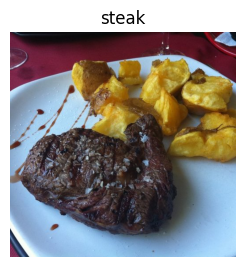

Image shape: (512, 512, 3)
['3128495.jpg']


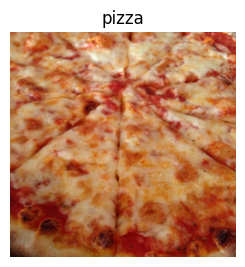

Image shape: (512, 512, 3)


In [59]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')